**To review or to do**

- Why we do not drop columns where there are a lot of null values?
- If you're interested in a challenge, try to complete the project using all of the separation types instead - you'll find more issues to work through in the data cleaning process.
- If there are a small amount of values that are unrealistically high or low, we can remove them.

# Find the reason why employees quit their job

## About the data

We'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.<br/> <br/> You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). The original TAFE exit survey data is no longer available. We've made some slight modifications to the original datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)

**Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:** <br/>
`ID`: An id used to identify the participant of the survey <br/>
`SeparationType`: The reason why the person's employment ended <br/>
`Cease Date`: The year or month the person's employment ended <br/>
`DETE Start Date`: The year the person began employment with the DETE <br/>

**Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:** <br/>
`Record ID`: An id used to identify the participant of the survey <br/>
`Reason for ceasing employment`: The reason why the person's employment ended <br/>
`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years) <br/>


## Project Objectives

Through this project we will try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## Data and libraries import

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from rich.console import Console
from rich.table import Table
import calendar
import seaborn as sns

## Funtions used in the project

In [168]:
def print_in_table(data, table_title, columns=["key", "value"]):
    
    table = Table(title=table_title)
    table.add_column(columns[0], justify="left", style="cyan", no_wrap=True)
    for col in columns[1::]:
        table.add_column(col, justify="left", style="magenta")
    for key, val in data.items():
        table.add_row(str(key), str(round(val,2)))
        
    console = Console()
    console.print(table)

## Data Cleaning 

### Raw data analysis

**Import and review the `dete_survey.csv` file**

In [169]:
date_survey = pd.read_csv('dete_survey.csv')
date_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [170]:
date_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


**Import and review the `tafe_survey.csv` file**

In [171]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [172]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Observations:**

- Some of the resons for quiting the job are the same for `date_survey` and `tafe_survey`, eg. "Resignation", "Termination", "Contract Expired"
- We can combine those two data sets by columns `ID` and `Recod ID`
- Data from `date_survey` data set, could serve as complement for some of the columns which contains a lot of null values in `tafe_survey` eg. "Business Unit"
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


### Inspect NaN values

**date_survey** - Inspect unique values from column `SeparationType`

In [173]:
print_in_table(date_survey['SeparationType'].value_counts(), "Date survey separation types", ('Type', 'Occurrence'))

            Date survey separation types             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Type                                 ┃ Occurrence ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Age Retirement                       │ 285        │
│ Resignation-Other reasons            │ 150        │
│ Resignation-Other employer           │ 91         │
│ Resignation-Move overseas/interstate │ 70         │
│ Voluntary Early Retirement (VER)     │ 67         │
│ Ill Health Retirement                │ 61         │
│ Other                                │ 49         │
│ Contract Expired                     │ 34         │
│ Termination                          │ 15         │
└──────────────────────────────────────┴────────────┘

**date_survey** - check for null values in columns

In [174]:
# columnsWithNullDate = date_survey.isnull().sum().sort_values().apply(lambda nullValues: nullValues > 0)
sumOfNullValInDate = date_survey.isnull().sum()
sumOfNullValInDate

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

<AxesSubplot:>

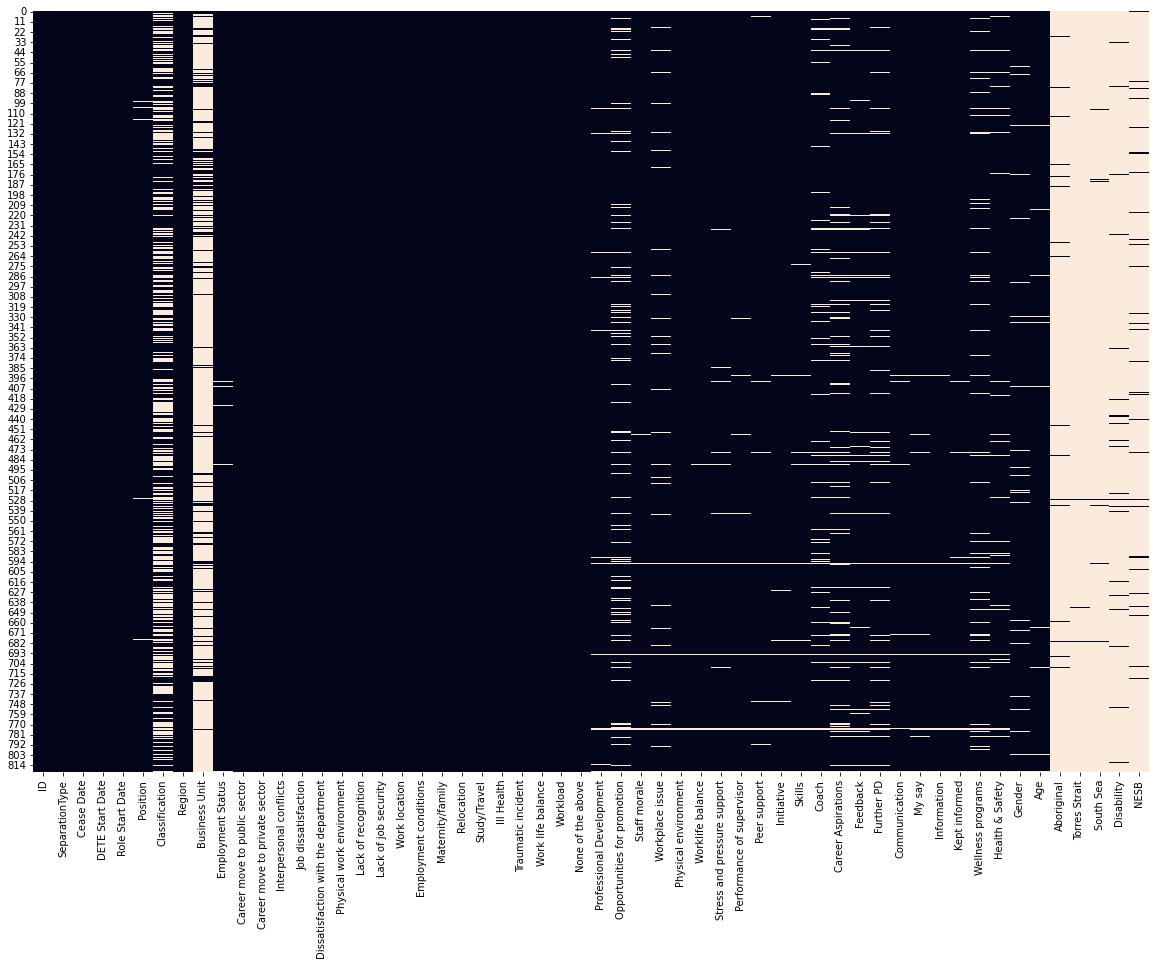

In [175]:
fig, ax = plt.subplots(figsize=(20,14))
# sns.heatmap(tafe_survey.set_index('CESSATION YEAR').isnull(), cbar=False, ax=ax)
sns.heatmap(date_survey.isnull(), cbar=False, ax=ax)

In [176]:
percentage_of_null_date_values = sumOfNullValInDate.apply(lambda x: round((x / 820) * 100, 2))
print_in_table(percentage_of_null_date_values, "Percendage of null values in each column", columns=['Column Name', '% of null values'])

         Percendage of null values in each column         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Column Name                         ┃ % of null values ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ ID                                  │ 0.0              │
│ SeparationType                      │ 0.0              │
│ Cease Date                          │ 0.0              │
│ DETE Start Date                     │ 0.0              │
│ Role Start Date                     │ 0.0              │
│ Position                            │ 0.61             │
│ Classification                      │ 44.76            │
│ Region                              │ 0.0              │
│ Business Unit                       │ 84.88            │
│ Employment Status                   │ 0.61             │
│ Career move to public sector        │ 0.0              │
│ Career move to private sector       │ 0.0              │
│ Interpersonal conflicts             │ 0.0              │
│ Job dissatisfaction                 │ 0.0              │
│ Dissatisfaction with the department │ 0.0              │
│ Physical work environment           │ 0.0              │
│ Lack of recognition                 │ 0.0              │
│ Lack of job security                │ 0.0              │
│ Work location                       │ 0.0              │
│ Employment conditions               │ 0.0              │
│ Maternity/family                    │ 0.0              │
│ Relocation                          │ 0.0              │
│ Study/Travel                        │ 0.0              │
│ Ill Health                          │ 0.0              │
│ Traumatic incident                  │ 0.0              │
│ Work life balance                   │ 0.0              │
│ Workload                            │ 0.0              │
│ None of the above                   │ 0.0              │
│ Professional Development            │ 1.71             │
│ Opportunities for promotion         │ 10.61            │
│ Staff morale                        │ 0.73             │
│ Workplace issue                     │ 4.15             │
│ Physical environment                │ 0.61             │
│ Worklife balance                    │ 0.85             │
│ Stress and pressure support         │ 1.46             │
│ Performance of supervisor           │ 1.1              │
│ Peer support                        │ 1.22             │
│ Initiative                          │ 1.1              │
│ Skills                              │ 1.34             │
│ Coach                               │ 6.71             │
│ Career Aspirations                  │ 9.27             │
│ Feedback                            │ 3.66             │
│ Further PD                          │ 6.59             │
│ Communication                       │ 0.98             │
│ My say                              │ 1.22             │
│ Information                         │ 0.73             │
│ Kept informed                       │ 1.1              │
│ Wellness programs                   │ 6.83             │
│ Health & Safety                     │ 3.54             │
│ Gender                              │ 2.93             │
│ Age                                 │ 1.34             │
│ Aboriginal                          │ 98.29            │
│ Torres Strait                       │ 99.88            │
│ South Sea                           │ 99.39            │
│ Disability                          │ 97.44            │
│ NESB                                │ 96.34            │
└─────────────────────────────────────┴──────────────────┘

**tafe_survey** - Inspect unique values from column `Reason for ceasing employment`

In [177]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

**tafe_survey** - check for null values in columns

In [178]:
columnsWithNullTafe = tafe_survey.isnull().sum().sort_values().apply(lambda nullValues: nullValues > 0)
sum_OfNull_val_series_tafe = tafe_survey.isnull().sum().sort_values()[columnsWithNullTafe]
sum_OfNull_val_series_tafe

Reason for ceasing employment                                                                        1
CESSATION YEAR                                                                                       7
Induction. Did you undertake Workplace Induction?                                                   83
InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had     87
InstituteViews. Topic:7. Management was generally supportive of me                                  88
                                                                                                  ... 
Contributing Factors. Career Move - Public Sector                                                  265
Contributing Factors. Maternity/Family                                                             265
Contributing Factors. Ill Health                                                                   265
InductionInfo. Topic:Did you undertake a Corporate Induction?            

<AxesSubplot:>

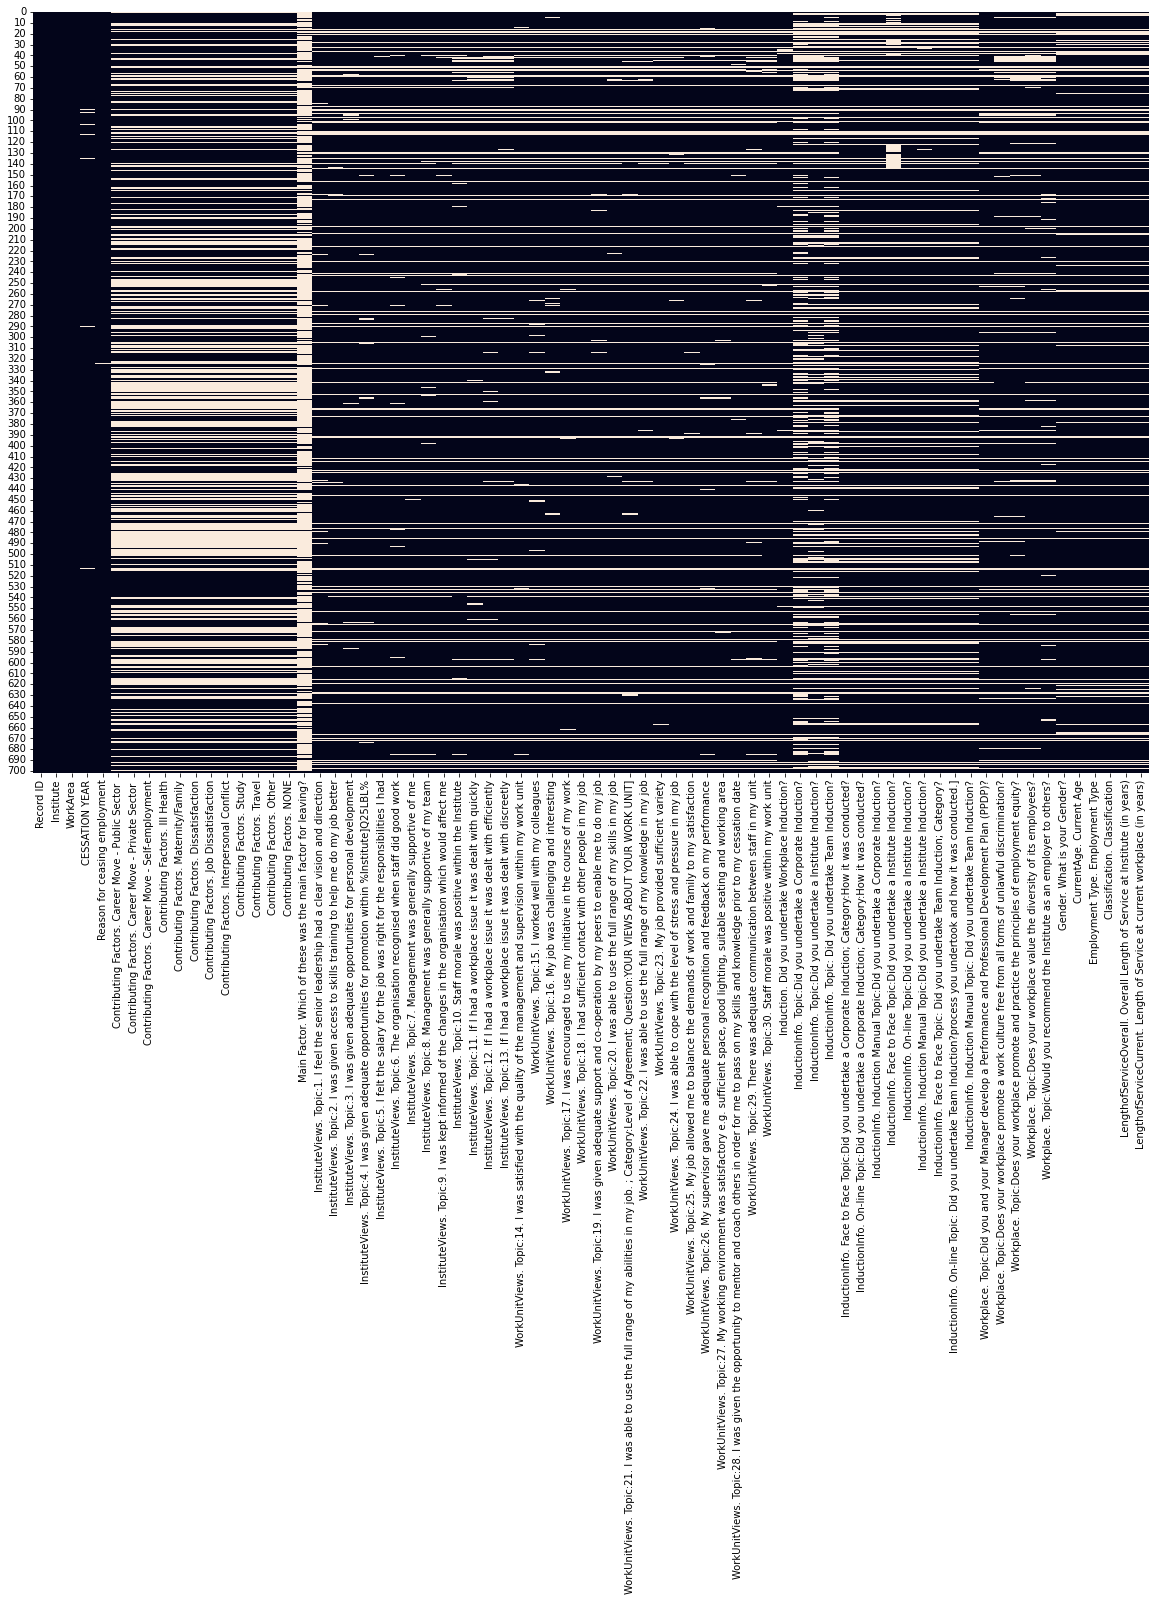

In [179]:
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(tafe_survey.isnull(), cbar=False, ax=ax)

In [180]:
percentage_of_null_tafe_values = sum_OfNull_val_series_tafe.apply(lambda x: round((x / 820) * 100, 2))
percentage_of_null_tafe_values_above_50 = percentage_of_null_tafe_values.apply(lambda x: x > 15)
percentage_of_null_tafe_values[percentage_of_null_tafe_values_above_50]

InductionInfo. Induction Manual Topic: Did you undertake Team Induction?                                           17.93
InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.]    17.93
InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?                                     17.93
InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?                                     17.93
InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?               17.93
InductionInfo. On-line Topic:Did you undertake a Institute Induction?                                              17.93
InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?          17.93
InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?                                     18.17
InductionInfo. Face to Face Topi

### Identify Missing Values and Drop Unnecessary Columns

Replace all `Not Stated` values with `Nan` in `date_survey`

In [181]:
date_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
date_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### Drop unecessary columns from `date_survey` that we won't use in our analysis to make the dataframes easier to work with

In [182]:
date_survey_updated = date_survey.drop(date_survey.columns[28:49], axis=1)
date_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

#### Drop unecessary columns from `tafe_survey` that we won't use in our analysis to make the dataframes easier to work with.

In [183]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

**Conclusions:**
- There a a lot of columns with high percentage of null values in `date_survey`
- We did drop columns from each data frame that we won't use in our analysis

### Clean Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis: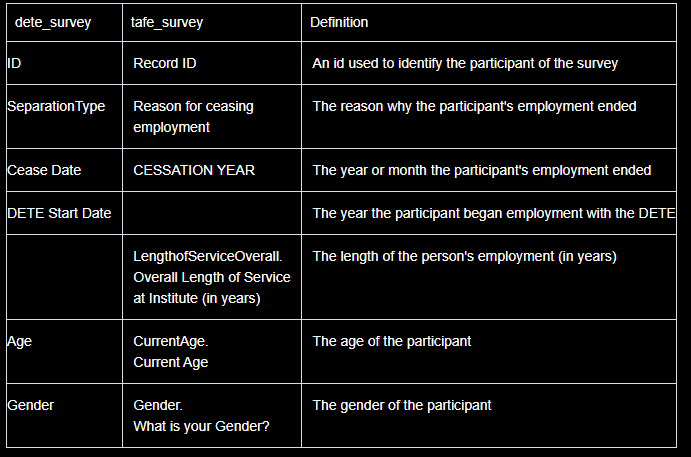

#### Rename columns in `dete_survey_updated` dataframe.

In [184]:
date_survey_updated.columns = date_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
date_survey_updated

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


#### Rename columns in `tafe_survey_updated` dataframe.

In [185]:
columns_to_rename_tafe = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns_to_rename_tafe, axis= 1, inplace=True)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Observations

### Filter the Data

Let's review the `separationtype` in both data sets

In [186]:
date_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [187]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

 Select only the data for survey respondents who have a `Resignation` separation type.

In [188]:
only_resignations_date = date_survey_updated['separationtype'].str.contains('Resignation') 
dete_resignations = date_survey_updated.copy()[only_resignations_date]
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [189]:
tafe_survey_updated['separationtype'].str.contains('Resignation').isna().sum()

1

In [190]:
only_resignations_tafe = tafe_survey_updated['separationtype'].str.contains('Resignation', na=False) 
tafe_resignations = tafe_survey_updated.copy()[only_resignations_tafe]
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

**Observations:**
- In each data sets we are interested in only `Resignation` separation type because our main goal is to deteminate a particular reason why emplyees resigned from the job
- `tafe_survey` data sets contaned one NaN values, therfore we need to set up `na=False` during string `contains` check
- `dete_resignations` inlcludes three different resignation types, wherease `tafe_resignations` data set has only one generic answer for all resignatins, so we do not know the particular reason behind it

### Verify the Data

Clean the `cease_date` column in `dete_resignations`

In [191]:
print_in_table(dete_resignations['cease_date'].value_counts(), 'Cease date unique values', ('Year', 'Occurrence'))

Cease date unique values
┏━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Year    ┃ Occurrence ┃
┡━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2012    │ 126        │
│ 2013    │ 74         │
│ 01/2014 │ 22         │
│ 12/2013 │ 17         │
│ 06/2013 │ 14         │
│ 09/2013 │ 11         │
│ 07/2013 │ 9          │
│ 11/2013 │ 9          │
│ 10/2013 │ 6          │
│ 08/2013 │ 4          │
│ 05/2012 │ 2          │
│ 05/2013 │ 2          │
│ 07/2012 │ 1          │
│ 2010    │ 1          │
│ 09/2010 │ 1          │
│ 07/2006 │ 1          │
└─────────┴────────────┘

In [193]:
year_pattern = r"([1-2][0-9]{3})"
dete_resignations_updated = dete_resignations.copy()
dete_resignations_updated['cease_date'] = dete_resignations['cease_date'].str.extract(year_pattern)
dete_resignations_updated['cease_date'] = dete_resignations_updated['cease_date'].astype(float)
print_in_table(dete_resignations_updated['cease_date'].value_counts(), 'Cease date unique values', ('Year', 'Occurrence'))

   Cease date unique   
        values         
┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Year   ┃ Occurrence ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ 2013.0 │ 146        │
│ 2012.0 │ 129        │
│ 2014.0 │ 22         │
│ 2010.0 │ 2          │
│ 2006.0 │ 1          │
└────────┴────────────┘

Clean the `dete_start_date` column in `dete_resignations`

In [213]:
dete_resignations_updated['dete_start_date'] = dete_resignations['dete_start_date'].astype(float)
print_in_table(dete_resignations_updated['dete_start_date'].value_counts().sort_index(ascending=False), 'Job start date unique values', ('Year', 'Occurrence'))

 Job start date unique 
        values         
┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Year   ┃ Occurrence ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ 2013.0 │ 10         │
│ 2012.0 │ 21         │
│ 2011.0 │ 24         │
│ 2010.0 │ 17         │
│ 2009.0 │ 13         │
│ 2008.0 │ 22         │
│ 2007.0 │ 21         │
│ 2006.0 │ 13         │
│ 2005.0 │ 15         │
│ 2004.0 │ 14         │
│ 2003.0 │ 6          │
│ 2002.0 │ 6          │
│ 2001.0 │ 3          │
│ 2000.0 │ 9          │
│ 1999.0 │ 8          │
│ 1998.0 │ 6          │
│ 1997.0 │ 5          │
│ 1996.0 │ 6          │
│ 1995.0 │ 4          │
│ 1994.0 │ 6          │
│ 1993.0 │ 5          │
│ 1992.0 │ 6          │
│ 1991.0 │ 4          │
│ 1990.0 │ 5          │
│ 1989.0 │ 4          │
│ 1988.0 │ 4          │
│ 1987.0 │ 1          │
│ 1986.0 │ 3          │
│ 1985.0 │ 3          │
│ 1984.0 │ 1          │
│ 1983.0 │ 2          │
│ 1982.0 │ 1          │
│ 1980.0 │ 5          │
│ 1977.0 │ 1          │
│ 1976.0 │ 2          │
│ 1975.0 │ 1          │
│ 1974.0 │ 2          │
│ 1973.0 │ 1          │
│ 1972.0 │ 1          │
│ 1971.0 │ 1          │
│ 1963.0 │ 1          │
└────────┴────────────┘

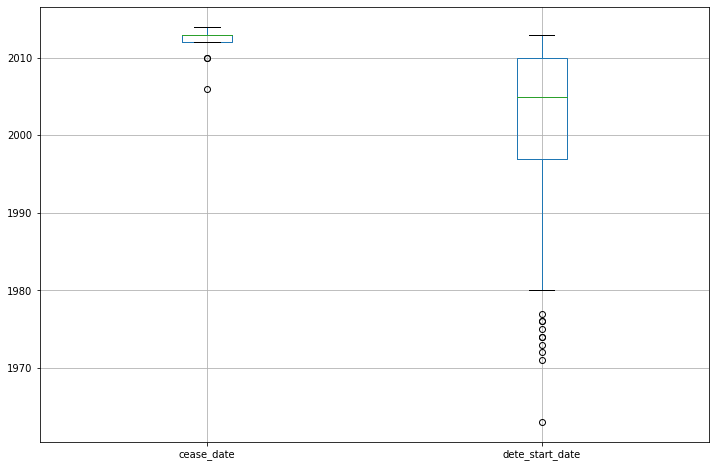

In [198]:
dete_resignations_updated.boxplot(column=['cease_date','dete_start_date'], figsize=(12,8))
plt.show()

Clean the `cease_date` column in `tafe_resignations`

In [196]:
print_in_table(tafe_resignations['cease_date'].value_counts(), 'Job start date unique values', ('Year', 'Occurrence'))

 Job start date unique 
        values         
┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Year   ┃ Occurrence ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ 2011.0 │ 116        │
│ 2012.0 │ 94         │
│ 2010.0 │ 68         │
│ 2013.0 │ 55         │
│ 2009.0 │ 2          │
└────────┴────────────┘

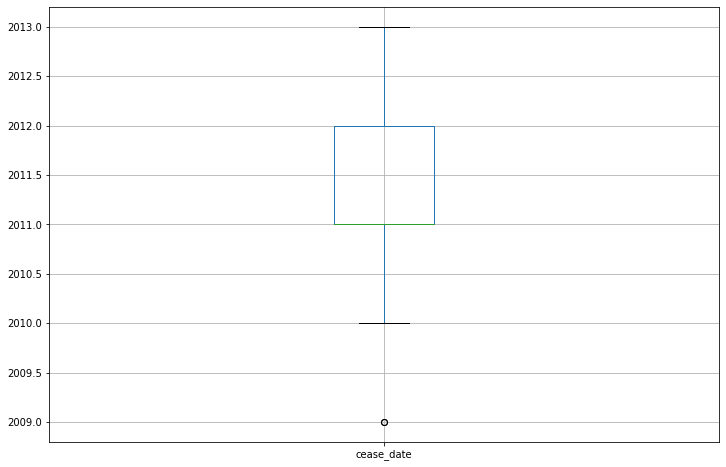

In [200]:
tafe_resignations.boxplot(column=['cease_date'], figsize=(12,8))
plt.show()

**Observations:**
- Majority of the employees who resigned had joined DETE between the late 1990's and 2010. Between year 2010 and 2014, a large percentage of these employees had resigned from the institution.
- Since we do not have detailed information on the job start dates from the TAFE resignation data. We cannot build a comprehensive visualization for the TAFE survey.

### Calculate years spend in the company

In [218]:
dete_resignations_updated['institute_service'].isnull().sum()

38

In [211]:
dete_resignations_updated['institute_service'] = dete_resignations_updated['cease_date'] - dete_resignations_updated['dete_start_date']
dete_resignations_updated['institute_service'].describe()
print_in_table(dete_resignations_updated['institute_service'].describe(), 'institute_service column metrics')

institute_service
 column metrics  
┏━━━━━━━┳━━━━━━━┓
┃ key   ┃ value ┃
┡━━━━━━━╇━━━━━━━┩
│ count │ 273.0 │
│ mean  │ 10.46 │
│ std   │ 9.93  │
│ min   │ 0.0   │
│ 25%   │ 3.0   │
│ 50%   │ 7.0   │
│ 75%   │ 16.0  │
│ max   │ 49.0  │
└───────┴───────┘

In [215]:
print_in_table(dete_resignations_updated['institute_service'].value_counts(bins=5), 'institute_service values ranges')

institute_service values
         ranges         
┏━━━━━━━━━━━━━━┳━━━━━━━┓
┃ key          ┃ value ┃
┡━━━━━━━━━━━━━━╇━━━━━━━┩
│ (-0.05, 9.8] │ 167   │
│ (9.8, 19.6]  │ 56    │
│ (19.6, 29.4] │ 32    │
│ (29.4, 39.2] │ 15    │
│ (39.2, 49.0] │ 3     │
└──────────────┴───────┘

In [216]:
dete_resignations_updated.shape

(311, 36)

**Observations:**
- 61% of the people worked below 10 years
- Average time spend in the company equals 10 years
- There were 3 persons who have worked more than 39 years

### Identify Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. </br></br>
`tafe_survey_updated`:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
</br></br>

`dete_survey_updated`:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload
</br></br>
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.